# Notebook 2: ML Metrics

In this notebook, you will manually implement _four_ important ML Metrics.

Create your own implementations for the following four metrics:

1. Binary Cross-Entropy Loss
1. $R^2$ Score
1. Silhouette Score
1. Area Under the Receiver Operating Characteristic Curve (ROC AUC)

Do ___not___ use existing libraries that contain metric implementations (e.g., `sklearn`).  The idea is that you implement solutions “manually,” e.g., using only `numpy` and/or `pandas`. After you have finished your implementation, verify the correctness of your solution by comparing your results to results produced by implementation in widely used python modules (e.g., `sklearn`, `statsmodels`, `scipy`).

Bonus:
- For each metric, (1) briefly explain in a few sentences what the metric evaluates, and (2) suggest two suitable applications in a marketing context.
- Create a Python package for your metrics functions.

In [1]:
import common
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.cluster
import sklearn.datasets
import sklearn.linear_model
import sklearn.metrics
import sklearn.metrics.pairwise
import sklearn.model_selection
import statsmodels.regression

<br>
<br>

## 1. &ensp; Binary Cross-Entropy Loss

Equation for the binary cross-entropy loss:

$
\quad{\displaystyle Loss= - \frac 1 N  \sum_{i} y_i\,\log p(x_i) + (1-y_i)\,\log \big(1-p(x_i)\big)}
$

where <br>
&emsp; $i$ is the index of a training sample (i.e., a pair of outcome and features), <br>
&emsp; $y_i$ is the (binary) outcome variable for training sample $i$, <br>
&emsp; $x_i$ is the vector of (one or more) features for training sample $i$, and <br>
&emsp; $p(x_i)$ is the probability of observing a positive outcome for $y_i$ given the observed values for $x_i$.<br>

Please have a look at [this blog post](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) for some additional background.

### Some questions to consider
- Can you describe the data produced by the next cell? What type of data can the BCE loss be used for?
- Can you describe the concept of entropy in words?
- Looking at the formula for the BCE Loss, what edge cases should you consider in your implementation?

### Simulate some data

In [2]:
X, y = sklearn.datasets.make_classification(
    n_samples=1_000,
    n_classes=2,
    n_features=20,
    random_state=123,
)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=123,
)

model1 = sklearn.linear_model.LogisticRegression()
model1.fit(X_train, y_train)

df = pd.DataFrame(
    {
        "y": y_test,
        "p": model1.predict_proba(X_test)[:, 1],
    }
)

### Implementation in `sklearn`

In [3]:
loss_skl = sklearn.metrics.log_loss(df["y"], df["p"])
loss_skl

0.15652352779549472

### Manual implementation

In [4]:
df_loss = df.copy()
df_loss["loss_i"] = -(
    df_loss["y"] * np.log(df_loss["p"]) + (1 - df_loss["y"]) * np.log(1 - df_loss["p"])
)
loss = df_loss["loss_i"].mean()
loss

0.15652352779549472

In [5]:
assert np.abs(loss - loss_skl) < 1e-12

<br>
<br>

## 2. &ensp; R<sup>2</sup> Score (Coefficient of Determination)

### Mathematical

Equation for coefficient of determination:

$
\quad {\displaystyle R^{2}=1-{SS_{\rm {res}} \over SS_{\rm {tot}}}\,}
$

with 

$
\quad {\displaystyle \color{red}{SS_{\text{tot}}}=\sum _{i}(y_{i}-{\bar {y}})^{2}}
$

$
\quad {\displaystyle \color{blue}{SS_{\text{res}}}=\sum _{i}(y_{i}-f_{i})^{2}=\sum _{i}e_{i}^{2}\,}
$

$
\quad {\bar {y}}={\frac {1}{n}}\displaystyle\sum _{i=1}^{n}y_{i}
$

Here, <br>
&emsp; $i$ is the index of a training sample, <br>
&emsp; $y_i$ is the observed outcome variable for training sample $i$, and <br>
&emsp; $f_i$ is the predicted outcome outcome for training sample $i$. <br>

### Visual

<img src=https://raw.githubusercontent.com/sbstn-gbl/learning-from-big-data/master/source/_static/img/r2.png width="700">

[(Source)](https://en.wikipedia.org/wiki/Coefficient_of_determination)

###  Some questions to consider
- Can you describe the coefficient of determination in words?
- What does $e_{i}$ in the equations above represent?
- How does the visualization relate to the equations above?
- What data can the $R^2$ be used for?

### Simulate some data

In [6]:
X, y, coef = sklearn.datasets.make_regression(
    n_samples=1_000,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=123,
)

lr = sklearn.linear_model.LinearRegression()
lr_res = lr.fit(X, y)

df = pd.DataFrame(
    {
        "y": y,
        "yhat": lr.predict(X),
    }
)

coef, lr.coef_

(array(74.2209235), array([74.05131859]))

### Visualize data

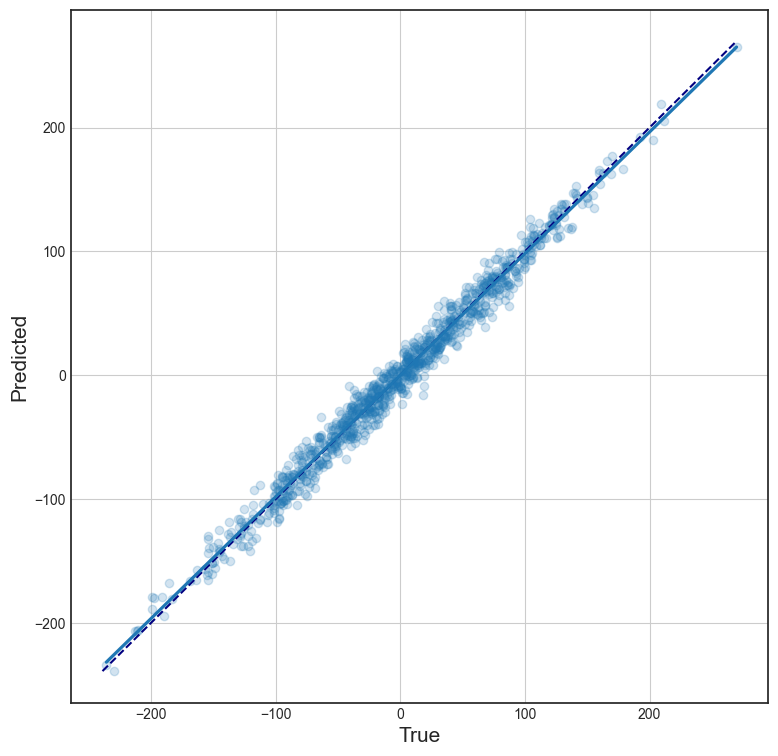

In [7]:
y_min = df.values.min()
y_max = df.values.max()
plt.plot(
    [y_min, y_max],
    [y_min, y_max],
    color="navy",
    linestyle="--",
)
sns.regplot(
    x="y",
    y="yhat",
    data=df,
    scatter_kws={"alpha": 0.2},
)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

### Implementation in `sklearn`

In [8]:
r2_skl = sklearn.metrics.r2_score(df["y"], df["yhat"])
r2_skl

0.9823251907480709

### Manual implementation

In [9]:
ss_tot = np.sum((np.mean(df["y"]) - df["y"]) ** 2)
ss_res = np.sum((df["yhat"] - df["y"]) ** 2)
r2 = 1 - ss_res / ss_tot
r2

0.9823251907480709

In [10]:
assert np.abs(r2 - r2_skl) < 1e-12

### Comparison to `statsmodels`

In [11]:
statsmodels.regression.linear_model.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                          5.555e+04
Date:                Mon, 29 Aug 2022   Prob (F-statistic):                        0.00
Time:                        22:12:16   Log-Likelihood:                         -3716.0
No. Observations:                1000   AIC:                                      7434.
Df Residuals:                     999   BIC:                                      7439.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            74.0407      0.314    235.695      0.000      73.424      74.657
==============================================================================
Omnibus:                        0.585   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.747   Jarque-Bera (JB):                0.658
Skew:                           0.050   Prob(JB):                        0.720
Kurtosis:                       2.925   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br>
<br>

## 3. &ensp; Silhouette

### Mathematical

For each point $i$ in your data set:

$
\quad {\displaystyle s(i)={\frac {b(i)-a(i)}{\max\{a(i),b(i)\}}}}
$

with

$
\quad {\displaystyle a(i)={\frac {1}{|C_{i}|-1}}\sum _{j\in C_{i},\ i\neq j}d(i,j)}
$

$
\quad {\displaystyle b(i)=\min _{k\neq i}{\frac {1}{|C_{k}|}}\sum _{j\in C_{k}}d(i,j)}
$

Here, <br>
&emsp; $i$ is the index of a point in your data set, <br>
&emsp; $d(i,j)$ is the distance between point $i$ and point $j$, <br>
&emsp; $C_{i}$ denotes the cluster that contains point $i$, and <br>
&emsp; $C_{k}$ denotes cluster $C_{i}$'s neighboring cluster (the cluster with the smallest mean distance of $i$ to all points in the second cluster). <br>

Please also have a look at [this sklearn tutorial](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py) to see how the silhouette score is used in practice.

### Visual

<img src=https://raw.githubusercontent.com/sbstn-gbl/learning-from-big-data/master/source/_static/img/silhouette.png width="600">

### Some questions to consider
- How do you aggregate the point-level silhouette scores to a global value across all points?
- Can you describe what the silhouette score represents in words?
- What are $a(i)$ and $b(i)$?
- How does the visualization relate to the equations above?

### Simulate some data

In [12]:
X, y = sklearn.datasets.make_blobs(
    n_samples=1_000,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=123,
)

### Implementation in `sklearn`

In [13]:
clusterer = sklearn.cluster.KMeans(
    n_clusters=3,
    random_state=123,
)
cluster_labels = clusterer.fit_predict(X)
sil_skl = sklearn.metrics.silhouette_score(
    X,
    cluster_labels,
)
sil_skl

0.7572367858256333

In [14]:
sil_samples_skl = sklearn.metrics.silhouette_samples(
    X,
    cluster_labels,
)
sil_samples_skl[:10]

array([0.73025532, 0.82151605, 0.69703736, 0.63047648, 0.72695219,
       0.72826653, 0.80876974, 0.46690515, 0.74743392, 0.75717757])

### Manual implementation

In [15]:
dist = sklearn.metrics.pairwise.euclidean_distances(X, X)

indices_in = {}
for k in np.unique(cluster_labels):
    index_k_in = np.where(cluster_labels == k)[0]
    indices_in[k] = index_k_in

sil_samples = []
for i in range(X.shape[0]):
    cluster_i = cluster_labels[i]
    indices_in_i = indices_in[cluster_i]

    a_i = dist[i, indices_in_i].sum() / (len(indices_in_i) - 1)

    b_i_k = []
    for k in indices_in:
        if k != cluster_i:
            indices_in_k = indices_in[k]
            b_i_k.append(dist[i, indices_in_k].sum() / len(indices_in_k))
    b_i = min(b_i_k)
    sil_samples.append((b_i - a_i) / np.max([b_i, a_i]))
sil = np.mean(sil_samples)
sil

0.7572367858256333

In [16]:
assert np.abs(sil - sil_skl) < 1e-12
assert np.max(np.abs(sil_samples - sil_samples_skl)) < 1e-12

<br>
<br>

## 4. &ensp; AUROC

From `sklearn` ([Source](https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics)):
> A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied. It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate. [...] The roc_auc_score function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC.

### Confusion matrix

<img src=https://raw.githubusercontent.com/sbstn-gbl/learning-from-big-data/master/source/_static/img/confusion.png width="1300">

[(Source)](https://en.wikipedia.org/wiki/Confusion_matrix)


### Some questions to consider
- What is a key advantage of the AUROC score?
- How is the AUROC related to the confusion matrix?
- What other AUC metrics do you know?

### Simulate some data

In [17]:
X, y = sklearn.datasets.make_classification(
    n_samples=1_000,
    n_classes=2,
    n_features=20,
    random_state=123,
)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=123,
)

model1 = sklearn.linear_model.LogisticRegression()
model1.fit(X_train, y_train)

df = pd.DataFrame({"y": y_test, "p": model1.predict_proba(X_test)[:, 1]})

### Implementation in `sklearn`

In [18]:
auc_skl = sklearn.metrics.roc_auc_score(df["y"], df["p"])
auc_skl

0.9850573174539453

In [19]:
fpr_skl, tpr_skl, _ = sklearn.metrics.roc_curve(df["y"], df["p"])

### Plot ROC Curve

In [20]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color="darkorange", lw=2)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic Curve")
    plt.show()

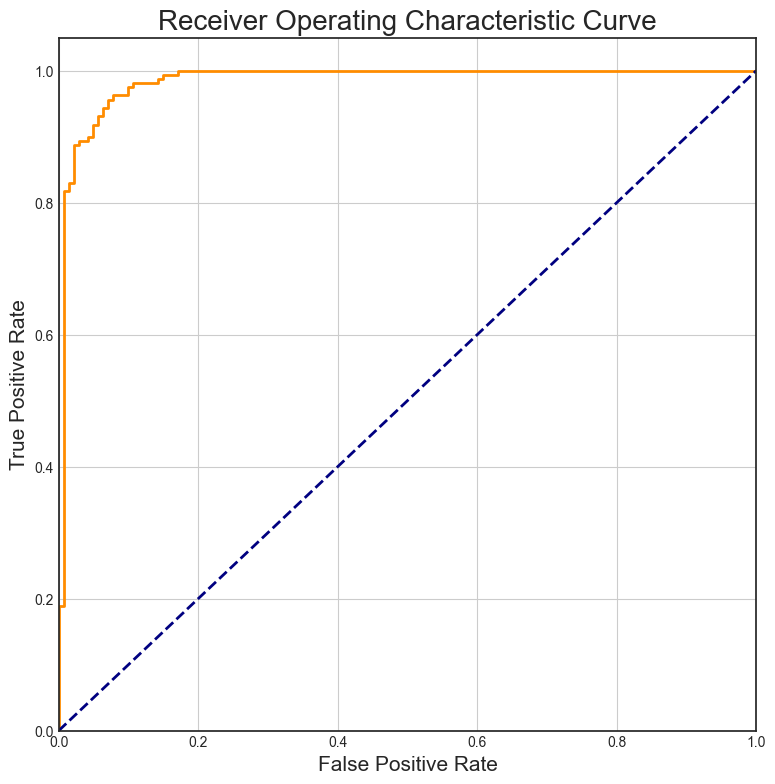

In [21]:
plot_roc_curve(fpr_skl, tpr_skl)

### Manual implementation

In [22]:
df_sorted = df.sort_values("p", ascending=False)

# compute true positive and false positive rate
n_positive = df_sorted["y"].sum()
n_negative = (1 - df_sorted["y"]).sum()
assert (n_positive + n_negative) == df.shape[0]

df_sorted["tpr"] = df_sorted["y"].cumsum() / n_positive
df_sorted["fpr"] = (1 - df_sorted["y"]).cumsum() / n_negative

# compute auc
fpr_tpr = df_sorted.groupby("fpr")[["tpr"]].max().reset_index()
delta_x = np.diff(fpr_tpr["fpr"].values)
delta_y = fpr_tpr["tpr"].shift(1)[1:].values
auc = delta_x.dot(delta_y)

In [23]:
assert np.abs(auc - auc_skl) < 1e-12

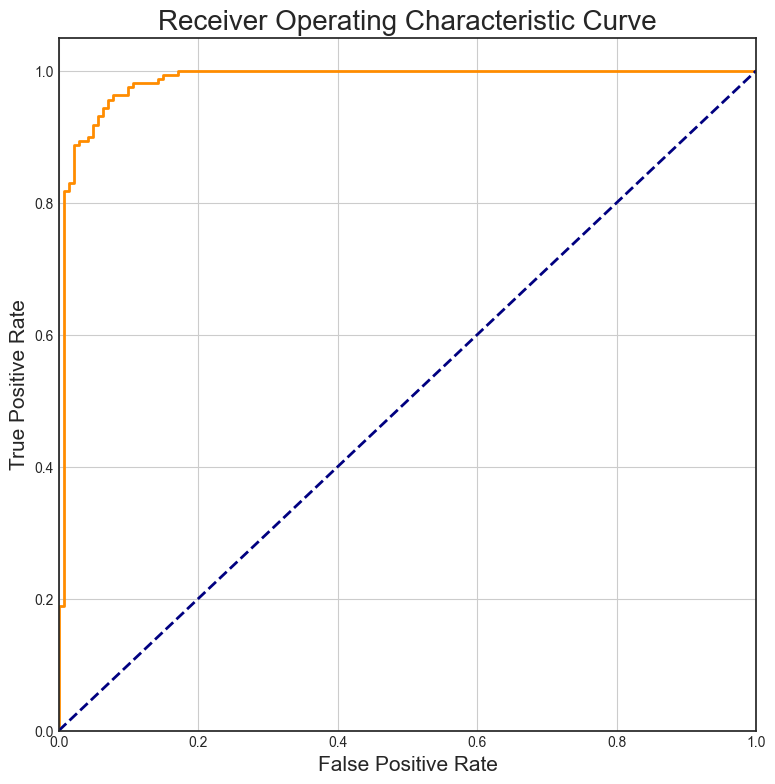

In [24]:
plot_roc_curve(df_sorted["fpr"], df_sorted["tpr"])

<br>
<br>
&mdash; <br>
Sebastian Gabel <br>
`Learning from Big Data` <br>